## 10 Academy: Artificial Intelligence Mastery
### Week 3 Challenge  
#### Insurance Analysis EDA
##### Ethel Cherotaw 

In [1]:
import sys
import os
import pandas as pd

script_dir=r'E:\2017.Study\Tenx\Week-3\Insurance\W3.Insurance-Planning.AIM2\scripts'
src_dir = r'E:\2017.Study\Tenx\Week-3\Insurance\W3.Insurance-Planning.AIM2\src'
data_dir = r'E:\2017.Study\Tenx\Week-3\Data\data'
sys.path.append(script_dir)
sys.path.append(src_dir)
sys.path.append(data_dir)
from utils import InsuranceDataUtils

##### Converting the .txt file to .csv 

In [4]:
txt_file_path = r'E:\2017.Study\Tenx\Week-3\Data\Data\MachineLearningRating_v3.txt'
df = pd.read_csv(txt_file_path, delimiter='|', encoding='utf-8', low_memory=False)
# Ensure the data directory exists
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
# Define path for the CSV file
csv_file_path = os.path.join(data_dir, 'raw_data.csv')
# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

In [5]:
csv_file_path = r'E:\2017.Study\Tenx\Week-3\Data\data\raw_data.csv'
# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, low_memory=False)

df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


#### Data Summarization:
variability for numerical features such as TotalPremium, TotalClaim..ETC 


In [6]:
utils = InsuranceDataUtils(df)
# Get descriptive statistics for numerical features
variability = utils.descriptive_statistics()
print("Descriptive Statistics:\n", variability)

# Review the data structure
column_types = utils.data_structure()
print("\nData Structure:\n", column_types)

Descriptive Statistics:
        UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000

About 1,000,000 items make up the dataset, and numerical parameters like insurance rates, claims, and car attributes vary greatly amongst them. Significant variance in the insurance data is indicated by the vast ranges and significant standard deviations of key columns like TotalPremium and TotalClaims. High variability is also shown in other numerical parameters, such as cubic capacity and kilowatts, which reflect a range of vehicle specifications. A combination of financial and car-related statistics are included in the dataset; several columns, such NumberOfVehiclesInFleet, have missing values.

Categorical data is represented as object types, including information on transaction details, vehicle attributes, and coverage specifics. Several columns, particularly date-related ones like TransactionMonth and VehicleIntroDate, are currently formatted as object and should be converted to datetime for accurate time-based analysis. Overall, the dataset offers a comprehensive view of insurance transactions and vehicle characteristics, but requires further processing of categorical and date columns to facilitate effective analysis.

#### Data Quality Assessment:



In [7]:
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values_summary = missing_values[missing_values > 0]

print("Missing Values Summary:")
print(missing_values_summary)

Missing Values Summary:
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


##### Handling Missing Values 

Managing missing values in insurance analysis is critical to preserving data integrity and guaranteeing precise results. Incomplete client profiles or gaps in vehicle information might result in missing data, which can skew risk evaluations and insurance costs. Columns with more than 50% missing values are eliminated to prevent bias, and 'Unknown' is used to fill in categorical data to maintain consistency. In order to account for central patterns in numerical data without being impacted by outliers, the median is imputed. Default values, such as 0, are assigned to special instances, such as the NumberOfVehiclesInFleet, to indicate their logical absence. These techniques aid in maintaining the data's dependability and suitability for precise analysis and decision-making.

In [8]:
# Create an instance of InsuranceDataUtils
utils = InsuranceDataUtils(df)

# Handle missing values
df_cleaned = utils.handle_missing_values()

# Check the result
print("Missing Values Summary:")
print(df_cleaned.isnull().sum())


Missing Values Summary:
UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle      

In [9]:
# Save the cleaned DataFrame to a CSV file
cleaned_csv_file_path = r'E:\2017.Study\Tenx\Week-3\Data\data\cleaned_data.csv'
df_cleaned.to_csv(cleaned_csv_file_path, index=False)

#### Univariate & Bivariate Analysis of Insurance Data: Distribution & Correlations

1. Univariate Analysis: Visualize distributions of numerical columns (histograms) and categorical columns (bar charts).
2. Bivariate/Multivariate Analysis: Examine relationships between TotalPremium and TotalClaims across ZipCode using scatter plots and 
   correlation matrices.

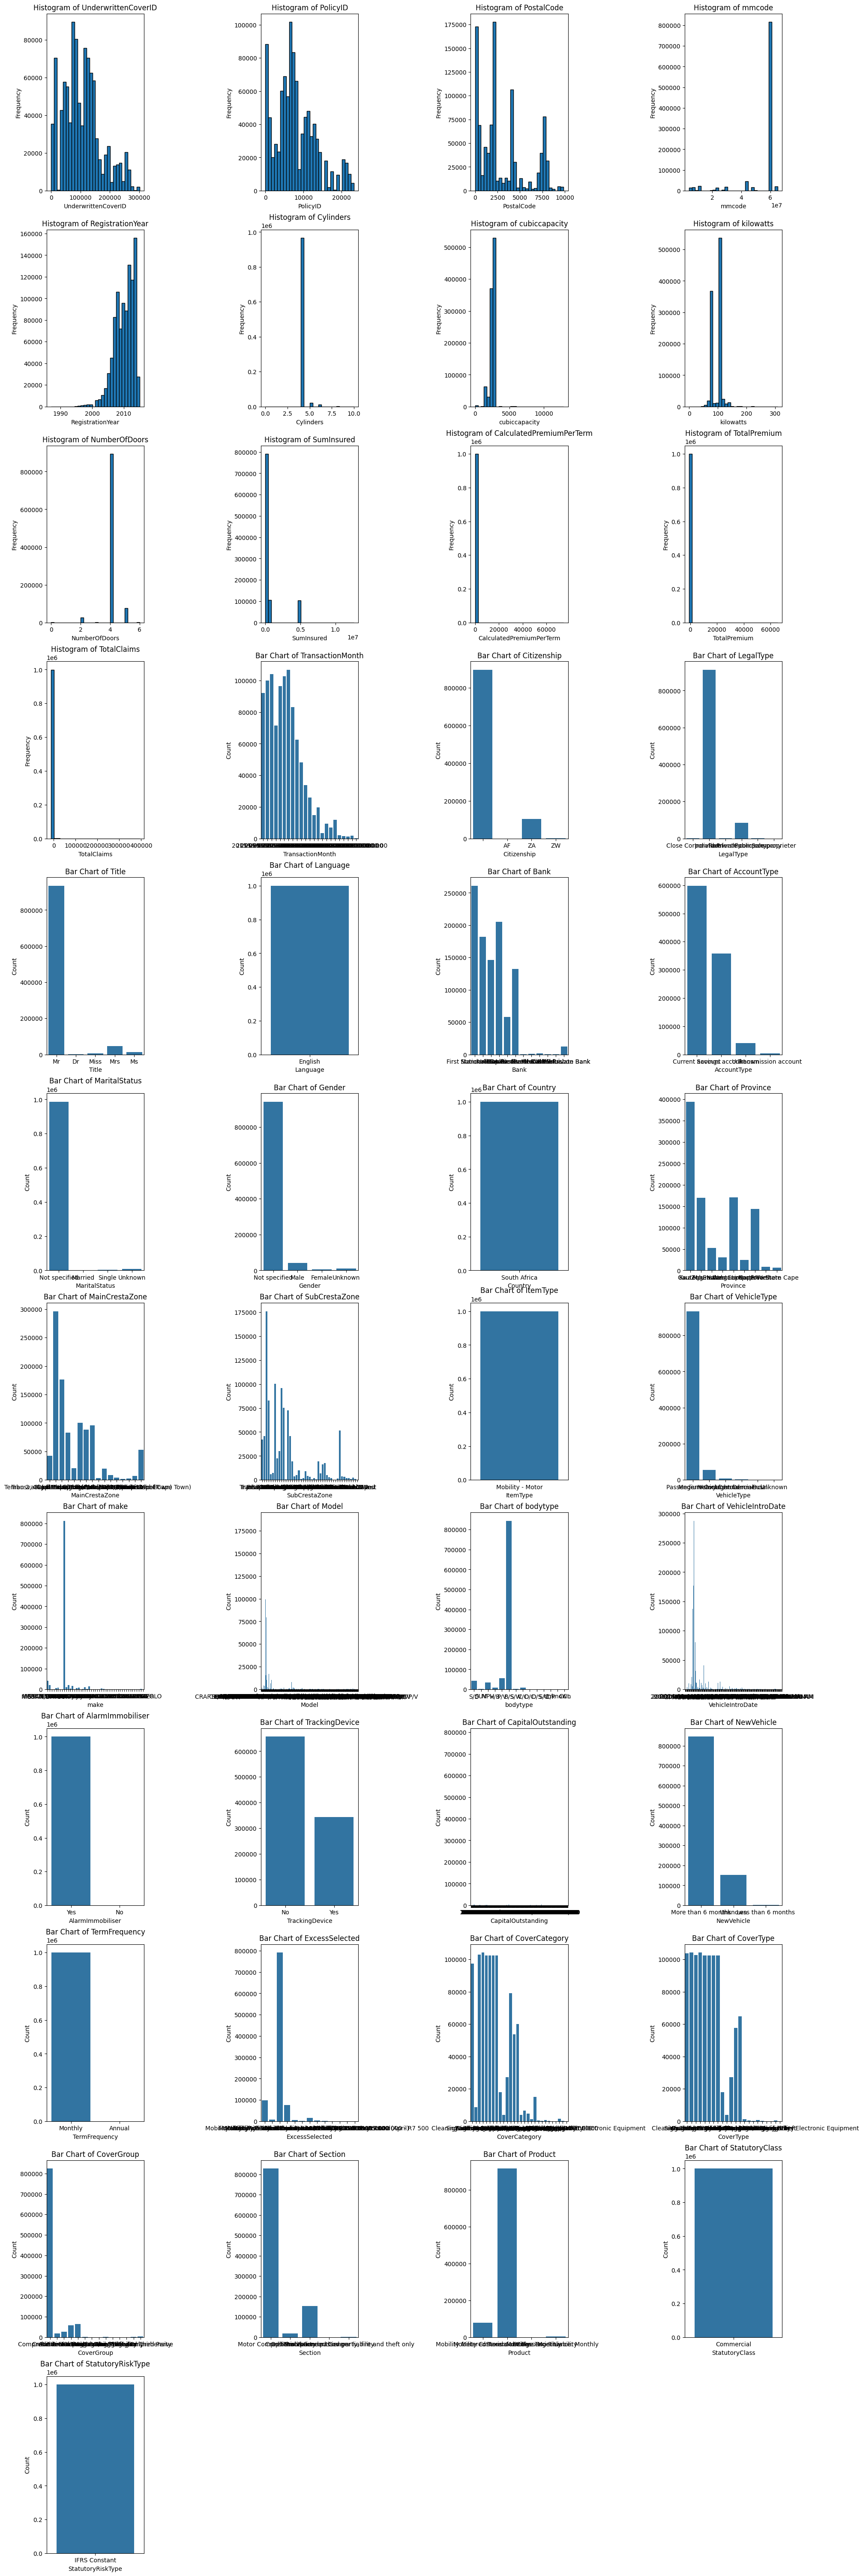

In [10]:
import pandas as pd
cleaned_csv_file_path = r'E:\2017.Study\Tenx\Week-3\Data\data\cleaned_data.csv'
df_cleaned= pd.read_csv(cleaned_csv_file_path, low_memory=False)
analysis = InsuranceDataUtils(df_cleaned)
analysis.univariate_analysis()

Missing values found in MonthlyTotalPremiumChange or MonthlyTotalClaimsChange after filling:
MonthlyTotalPremiumChange    1
MonthlyTotalClaimsChange     1
dtype: int64


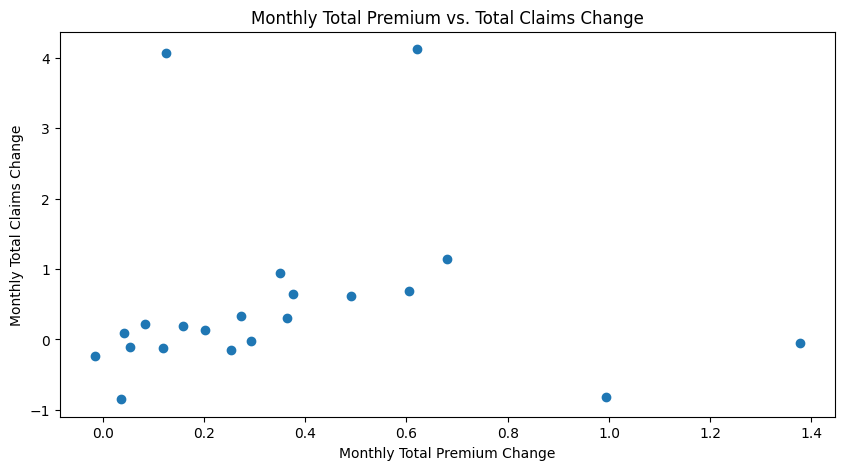

Correlation Matrix:
                           MonthlyTotalPremiumChange  MonthlyTotalClaimsChange
MonthlyTotalPremiumChange                   1.000000                  0.053804
MonthlyTotalClaimsChange                    0.053804                  1.000000


In [11]:
import pandas as pd
cleaned_csv_file_path = r'E:\2017.Study\Tenx\Week-3\Data\data\cleaned_data.csv'
df_cleaned= pd.read_csv(cleaned_csv_file_path, low_memory=False)
analysis = InsuranceDataUtils(df_cleaned)
analysis.bivariate_analysis()


#### Data Comparison(Trends Over Geography),Outlier Detection and Visualization
 

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice',
       'CapitalOutstanding', 'NewVehicle', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims'],
      dtype='object')
0    South Africa
1    South Africa
2    South Africa
3    South Africa
4    South Africa
Name: Country, dtype: object


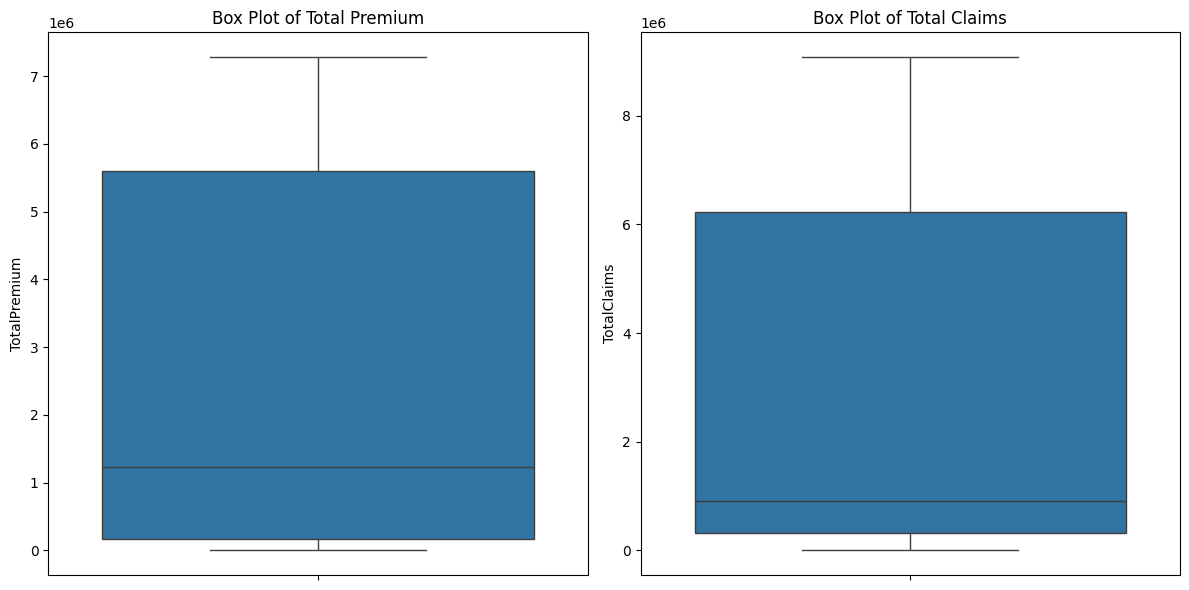

ValueError: DataFrame must contain a 'Country' column.

In [3]:
import pandas as pd
cleaned_csv_file_path = r'E:\2017.Study\Tenx\Week-3\Data\data\cleaned_data.csv'
df_cleaned= pd.read_csv(cleaned_csv_file_path, low_memory=False)
print(df_cleaned.columns)
print(df_cleaned['Country'].head())

insurance_utils = InsuranceDataUtils(df_cleaned)
# Preprocess data
insurance_utils.preprocess_data()
#insurance_utils.compare_data()
# Detect outliers
insurance_utils.detect_outliers()
# Produce creative and beautiful plots
#insurance_utils.visualize_data()
insurance_utils.compare_data()
